In [1]:
import json
import cartopy
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing

In [2]:
with open("Earth Meteorite Landings.json") as f:
    data = json.load(f)

In [3]:
# print(json.dumps(data, indent=2))

In [4]:
data[0]

{'name': 'Aachen',
 'id': '1',
 'nametype': 'Valid',
 'recclass': 'L5',
 'mass': '21',
 'fall': 'Fell',
 'year': '1880-01-01T00:00:00.000',
 'reclat': '50.775000',
 'reclong': '6.083330',
 'geolocation': {'latitude': '50.775', 'longitude': '6.08333'}}

In [5]:
df = pd.DataFrame(data)
df = df.drop([":@computed_region_cbhk_fwbd", ":@computed_region_nnqa_25f4"], axis=1)
df = df.astype(str)

In [6]:
# df['mass']
df.mass.value_counts()

nan                   28
4000                  15
1000                  14
6000                  13
2000                  13
                      ..
72.900000000000006     1
13200                  1
9700                   1
36.1                   1
224.2                  1
Name: mass, Length: 640, dtype: int64

In [7]:
new_df = df.drop(df[df.mass == 'nan'].index)
new_df['year'] = new_df['year'].astype(str)
new_df = new_df.drop(new_df[new_df.year == '<NA>'].index)
# new_df.mass.value_counts()
new_df["mass"] = np.floor(pd.to_numeric(new_df["mass"], errors='coerce')).astype('Int64')
# new_df = new_df[new_df["mass"] > 500000]
# new_df.mass.value_counts()

new_df['year'] = pd.to_datetime(df['year'], errors = 'coerce')
new_df['year'] = new_df['year'].dt.year.astype('Int64')
new_df

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,geolocation
0,Aachen,1,Valid,L5,21,Fell,1880,50.775000,6.083330,"{'latitude': '50.775', 'longitude': '6.08333'}"
1,Aarhus,2,Valid,H6,720,Fell,1951,56.183330,10.233330,"{'latitude': '56.18333', 'longitude': '10.23333'}"
2,Abee,6,Valid,EH4,107000,Fell,1952,54.216670,-113.000000,"{'latitude': '54.21667', 'longitude': '-113.0'}"
3,Acapulco,10,Valid,Acapulcoite,1914,Fell,1976,16.883330,-99.900000,"{'latitude': '16.88333', 'longitude': '-99.9'}"
4,Achiras,370,Valid,L6,780,Fell,1902,-33.166670,-64.950000,"{'latitude': '-33.16667', 'longitude': '-64.95'}"
...,...,...,...,...,...,...,...,...,...,...
995,Tirupati,24009,Valid,H6,230,Fell,1934,13.633330,79.416670,"{'latitude': '13.63333', 'longitude': '79.41667'}"
996,Tissint,54823,Valid,Martian (shergottite),7000,Fell,2011,29.481950,-7.611230,"{'latitude': '29.48195', 'longitude': '-7.61123'}"
997,Tjabe,24011,Valid,H6,20000,Fell,1869,-7.083330,111.533330,"{'latitude': '-7.08333', 'longitude': '111.533..."
998,Tjerebon,24012,Valid,L5,16500,Fell,1922,-6.666670,106.583330,"{'latitude': '-6.66667', 'longitude': '106.583..."


<AxesSubplot:title={'center':'Amounts of meteorites (top five)'}, xlabel='year'>

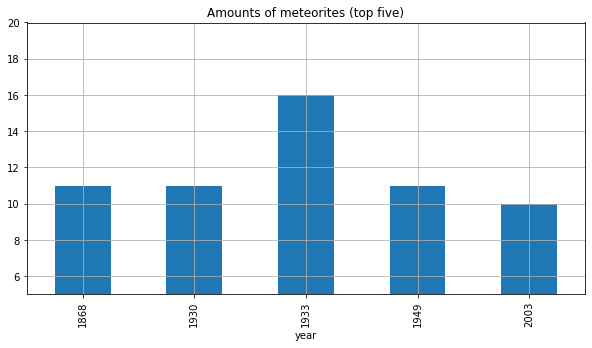

In [8]:
amounts_by_year_top_five_df = new_df.year.value_counts().rename_axis('year').reset_index(name='counts')
amounts_by_year_top_five_df = amounts_by_year_top_five_df.nlargest(5, 'counts', keep='first')
amounts_by_year_top_five_df = amounts_by_year_top_five_df.set_index('year')
amounts_by_year_top_five_df = amounts_by_year_top_five_df.sort_values(by=['year'])
amounts_by_year_top_five_df['counts'].plot(kind='bar', grid=True, figsize=(10,5), ylim=(5, 20), title='Amounts of meteorites (top five)')


In [9]:
new_df['amounts_by_year'] = new_df.groupby(['year'])['year'].transform('count').astype('Int64')
new_df = new_df.dropna()
new_df

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,geolocation,amounts_by_year
0,Aachen,1,Valid,L5,21,Fell,1880,50.775000,6.083330,"{'latitude': '50.775', 'longitude': '6.08333'}",5
1,Aarhus,2,Valid,H6,720,Fell,1951,56.183330,10.233330,"{'latitude': '56.18333', 'longitude': '10.23333'}",5
2,Abee,6,Valid,EH4,107000,Fell,1952,54.216670,-113.000000,"{'latitude': '54.21667', 'longitude': '-113.0'}",5
3,Acapulco,10,Valid,Acapulcoite,1914,Fell,1976,16.883330,-99.900000,"{'latitude': '16.88333', 'longitude': '-99.9'}",9
4,Achiras,370,Valid,L6,780,Fell,1902,-33.166670,-64.950000,"{'latitude': '-33.16667', 'longitude': '-64.95'}",7
...,...,...,...,...,...,...,...,...,...,...,...
995,Tirupati,24009,Valid,H6,230,Fell,1934,13.633330,79.416670,"{'latitude': '13.63333', 'longitude': '79.41667'}",10
996,Tissint,54823,Valid,Martian (shergottite),7000,Fell,2011,29.481950,-7.611230,"{'latitude': '29.48195', 'longitude': '-7.61123'}",4
997,Tjabe,24011,Valid,H6,20000,Fell,1869,-7.083330,111.533330,"{'latitude': '-7.08333', 'longitude': '111.533...",6
998,Tjerebon,24012,Valid,L5,16500,Fell,1922,-6.666670,106.583330,"{'latitude': '-6.66667', 'longitude': '106.583...",6


In [10]:
mass_top_five_df = mass_year_df.nlargest(5, 'mass', keep='all')
mass_top_five_df = mass_top_five_df.sort_values(by=['year'])
mass_top_five_df['mass'].plot(kind='bar', grid=True, figsize=(10,5), ylim=(40000, 25000000), title='Mass of meteorites (top five)')

NameError: name 'mass_year_df' is not defined

In [ ]:
lat = []
lon = []
for i in range(len(new_df['reclat'])):
    try:
        lat.append(new_df['reclat'][i])
        lon.append(new_df['reclong'][i])
    except:
        continue

In [ ]:
fig = plt.figure(dpi=300)
ax = fig.add_subplot(111, projection=cartopy.crs.PlateCarree())
ax.scatter([lon], [lat], s=0.5, color="red")
ax.coastlines()
ax.set_title('Earth Meteorite Landings', fontsize=8)
ax.set_global()

In [ ]:
fig = plt.figure(figsize=(25,12))
ax = fig.add_subplot(1,1,1, projection=cartopy.crs.PlateCarree())
ax.stock_img()
plt.scatter(x=[lon], y=[lat],
            color="brown",
            s=10,
            alpha=1,
            transform=cartopy.crs.PlateCarree())

ax.add_feature(cartopy.feature.COASTLINE, edgecolor="dodgerblue")
ax.add_feature(cartopy.feature.BORDERS, edgecolor="green")

ax.set_title('Earth Meteorite Landings', fontsize=30)
ax.set_global()


plt.show()


# 1. Distribution of Meteorite by reclass

Text(0.5, 1.0, 'Occurence of Different Types of Meteorite')

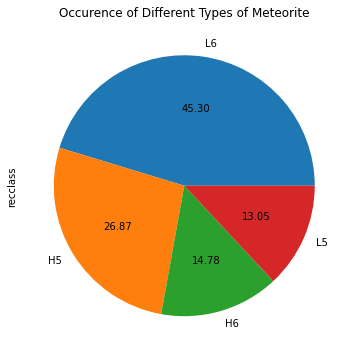

In [47]:
diff_rec = new_df['recclass'].value_counts()
diff_rec[diff_rec > 50].plot.pie(autopct='%.2f',figsize=(6,6))
plt.title('Occurence of Different Types of Meteorite', fontsize=12)

In [18]:
L6 = new_df[new_df.recclass=='L6']
H5 = new_df[new_df.recclass=='H5']

<function matplotlib.pyplot.show(close=None, block=None)>

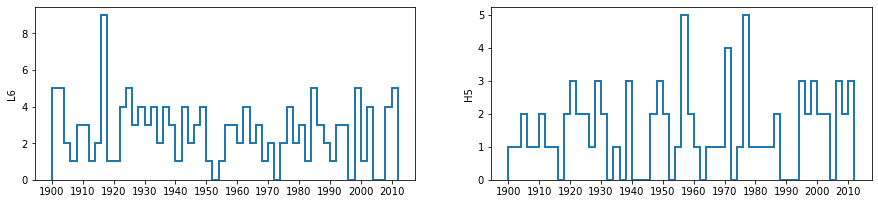

In [45]:
plt.figure(figsize=(15,7))

plt.subplot(221)
plt.hist(L6.year.values,bins=np.arange(1900,2014,2),lw=2,histtype='step')
plt.ylabel('L6')
plt.xticks(np.arange(1900,2015,10))

plt.subplot(222)
plt.hist(H5.year.values,bins=np.arange(1900,2014,2),lw=2,histtype='step')
plt.ylabel('H5')
plt.xticks(np.arange(1900,2015,10))
plt.show

In [54]:
plt.subplot(2)
new_df.year.hist(bins=np.arange(1900,2018,1),figsize=(14,8),histtype='step')
plt.title('Discoveries Per Year')
plt.xlim(1900,2018)

plt.subplot(2)
new_df.year.hist(bins=np.arange(1900,2018,10),figsize=(14,8),histtype='stepfilled')
plt.title('Discoveries Per Decade')
plt.xlim(1900,2018)

ValueError: Single argument to subplot must be a three-digit integer, not 2

<Figure size 432x288 with 0 Axes>